# Lecture 11 Mapping Shootings 
- Name: Nishika Kambli
- Division: B 

In [1]:
# setup
import pandas as pd 

In [2]:
#
shootings_df = pd.read_csv("Mass-Shooting-Data-2016.csv")
shootings_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [3]:
#first 10 rows in my DataFrame 
shootings_df.head(10)

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418
6,30-Oct-16,New York (Manhattan),New York,4,0,40.748436,-73.985693
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607


In [4]:
#avg people injured and killed by the state and city
avg_injuries_killed_df = shootings_df.groupby(["state", "city"]).agg(avg_injuries = ("injured", "mean"), 
                                                                     avg_killed = ("killed", "mean"))
avg_injuries_killed_df

avg_injuries  avg_killed
state         city                                         
Alabama       Anniston                      4.0         0.0
              Auburn                        1.0         3.0
              Bessemer                      3.0         1.0
              Bessemer (Brighton)           6.0         1.0
              Birmingham                    4.0         1.0
...                                         ...         ...
Washington    Seattle                       3.0         2.0
              Tacoma                        5.0         0.0
              Woodland                      1.0         3.0
West Virginia Charleston                    3.0         1.0
Wisconsin     Milwaukee                     2.5         1.5

[194 rows x 2 columns]

In [5]:
total_injuries_killed_df = shootings_df.groupby(["state", "city"]).agg(injuries = ("injured", "sum"), 
                                                                     killed = ("killed", "sum"))
total_injuries_killed_df

injuries  killed
state         city                                 
Alabama       Anniston                    4       0
              Auburn                      1       3
              Bessemer                    3       1
              Bessemer (Brighton)         6       1
              Birmingham                  4       1
...                                     ...     ...
Washington    Seattle                     3       2
              Tacoma                      5       0
              Woodland                    1       3
West Virginia Charleston                  3       1
Wisconsin     Milwaukee                   5       3

[194 rows x 2 columns]

In [6]:
# sort by killed column in ascending 
total_injuries_killed_df.sort_values("killed", ascending=True)

,,injuries,killed
state,city,,
Alabama,Anniston,4,0
New Jersey,Willingboro,4,0
New York,Bronx,4,0
Florida,Miami Gardens,4,0
New York,Brooklyn,24,0
...,...,...,...
Arizona,Glendale,5,8
Ohio,Piketon,0,8
Texas,Houston,31,10


In [7]:
#sort by killed coloumn descending
total_injuries_killed_df.sort_values("killed", ascending=False)

injuries  killed
state      city                                  
Florida    Orlando                     77      55
Illinois   Chicago                     87      11
Texas      Houston                     31      10
California Los Angeles                 36       8
Arizona    Glendale                     5       8
...                                   ...     ...
New York   New York (Manhattan)         8       0
           Elmira                       5       0
           Corona (Queens)              4       0
           Brooklyn                    24       0
Alabama    Anniston                     4       0

[194 rows x 2 columns]

In [8]:
# top 5 cities DataFrame in the US with the most killed
top_5_cities_killed = total_injuries_killed_df.sort_values("killed", ascending=False).head(5)
top_5_cities_killed

,,injuries,killed
state,city,,
Florida,Orlando,77,55
Illinois,Chicago,87,11
Texas,Houston,31,10
California,Los Angeles,36,8
Arizona,Glendale,5,8


In [9]:
state_injuries_df = shootings_df.groupby(["state"]).agg(injuries = ("injured", "sum"))
top_5_states_injuries_df= state_injuries_df.sort_values("injuries", ascending=False).head(5)
top_5_states_injuries_df

,injuries
state,
Florida,169
California,155
Illinois,127
Texas,94
New York,57


# 2016 Mass Shootings Report 

In [10]:
total_injuries = shootings_df.injured.sum()
total_injuries

1311

In [11]:
#total killed 
total_killed = shootings_df.killed.sum()
total_killed

400

# Create a variable

In [12]:
sentence = "In 2016, there were " + str(total_injuries) + str(total_killed) + ", due to mass shootings"
sentence

'In 2016, there were 1311400, due to mass shootings'

# Lecture 12 starts here

In [17]:
# creating a coloumn persons involved in shootings df 
shootings_df["persons_involved"] = shootings_df["injured"] + shootings_df["killed"]

#creating a city DataFrame to calculate total persons invloved and total incidents per city
city_df = shootings_df.groupby(["state", "city"]).agg(total_persons_involved = ("persons_involved", "sum"), 
                                                      total_incidents = ("city", "count"))

#creating a column to calculate total persons per incident
city_df["persons_involved_per_incident"] = city_df["total_persons_involved"]/city_df["total_incidents"]

#creating our final Z- index DataFrame which shows only cities which have atleast 5 persons involved per incident 
z_index_df = city_df.loc[city_df["persons_involved_per_incident"]>=5].sort_values("persons_involved_per_incident", 
                                                                                  ascending=False )
z_index_df

,,total_persons_involved,total_incidents,persons_involved_per_incident
state,city,,,
Florida,Orlando,132,5,26.4
Kansas,Hesston,18,1,18.0
California,Bakersfield,15,1,15.0
Connecticut,Bridgeport,13,1,13.0
Florida,Fort Myers,25,2,12.5
...,...,...,...,...
Alabama,Birmingham,5,1,5.0
Maryland,District Heights (Forestville),5,1,5.0
Michigan,Berrien (county),5,1,5.0


# Hoz index

In [19]:
# filter for incidents in which there were atleast 1 person killed
atleast_1_killed_df = shootings_df.loc[shootings_df["killed"]>1]
atleast_1_killed_df

,date,city,state,injured,killed,lat,lng,persons_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6
14,27-Oct-16,Mcdonough (Mc Donough),Georgia,0,4,33.447340,-84.146860,4
16,25-Oct-16,Roanoke,Virginia,3,2,37.270973,-79.941431,5
...,...,...,...,...,...,...,...,...
314,30-Jan-16,Glendale,Arizona,5,3,33.538985,-112.185816,8
315,27-Jan-16,Chesapeake,Virginia,0,6,36.718371,-76.246680,6
316,26-Jan-16,Seattle,Washington,3,2,47.603832,-122.330062,5
318,23-Jan-16,Los Angeles,California,2,2,34.054394,-118.243941,4


In [20]:
# sort in descending to see cities with the maximum incidents in which there was atleast 1 person killed
hoz_city_df = atleast_1_killed_df.groupby(["state", "city"]).agg(total_incidents = ("city", "count"))
hoz_city_df.sort_values("total_incidents", ascending=False)

total_incidents
state     city                             
Illinois  Chicago                         3
Florida   Orlando                         3
Texas     Houston                         2
Arizona   Glendale                        2
          Phoenix                         2
...                                     ...
Maryland  Bethesda                        1
          Capitol Heights                 1
Alabama   Citronelle                      1
Michigan  Berrien (county)                1
Wisconsin Milwaukee                       1

[74 rows x 1 columns]

# Kha index

In [23]:
# average person involved per incident 
avg_persons_involved_per_incident = shootings_df.persons_involved.mean()
avg_persons_involved_per_incident

5.264615384615385

In [24]:
city_df.loc[city_df["persons_involved_per_incident"]>avg_persons_involved_per_incident]

total_persons_involved  \
state         city                                               
Alabama       Bessemer (Brighton)                            7   
Arizona       Glendale                                      13   
              Phoenix                                       15   
California    Bakersfield                                   15   
              Compton                                        9   
              Los Angeles                                   44   
Connecticut   Bridgeport                                    13   
Florida       Cape Coral                                     6   
              Fort Myers                                    25   
              Jacksonville                                  11   
              Orlando                                      132   
              Tampa                                         12   
Georgia       Appling                                        6   
              Athens                                         7   
Illinois      Rockford                                       6   
Kansas        Hesston                                       18   
Louisiana     Shreveport                                    12   
Maryland      Bethesda                                       6   
              Capitol Heights                                6   
Massachusetts Chelsea                                        7   
Michigan      Grand Rapids                                   9   
              Kalamazoo                                      8   
Mississippi   Jackson                                        6   
              Pass Christian                                 6   
Missouri      Kansas City                                    6   
New Jersey    Egg Harbor City                                6   
              Trenton                                       11   
New York      Newburgh                                       7   
              Rochester                                      8   
Ohio          Hamilton                                       8   
              Piketon                                        8   
Oklahoma      Wellston                                       6   
Pennsylvania  Pittsburgh (Wilkinsburg)                       8   
Tennessee     Clarksville                                    6   
Texas         Dallas                                        23   
              Edinburg                                       7   
              Fort Worth                                     7   
              Lubbock                                        6   
Virginia      Chesapeake                                     6   
              Roanoke                                       20   

                                        total_incidents  \
state         city                                        
Alabama       Bessemer (Brighton)                     1   
Arizona       Glendale                                2   
              Phoenix                                 2   
California    Bakersfield                             1   
              Compton                                 1   
              Los Angeles                             8   
Connecticut   Bridgeport                              1   
Florida       Cape Coral                              1   
              Fort Myers                              2   
              Jacksonville                            2   
              Orlando                                 5   
              Tampa                                   2   
Georgia       Appling                                 1   
              Athens                                  1   
Illinois      Rockford                                1   
Kansas        Hesston                                 1   
Louisiana     Shreveport                              2   
Maryland      Bethesda                                1   
              Capitol Heights                         1   
Massachusetts Chelsea       

# Data visualization(bar charts)

In [35]:
# Data Viz setup
import seaborn as sns 
import matplotlib.pyplot as plt 

## make a barchart that shows top 10 cities by killed 

In [36]:
bar_chart_df = shootings_df.groupby(["state", "city"]).agg(killed = ("killed", "sum"))
bar_chart_df = bar_chart_df.sort_values("killed", ascending=False).head(10).reset_index()
bar_chart_df

,state,city,killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8
5,Ohio,Piketon,8
6,Florida,Miami,7
7,Georgia,Appling,6
8,Texas,Austin,6
9,Texas,Dallas,6


<AxesSubplot:xlabel='city', ylabel='killed'>

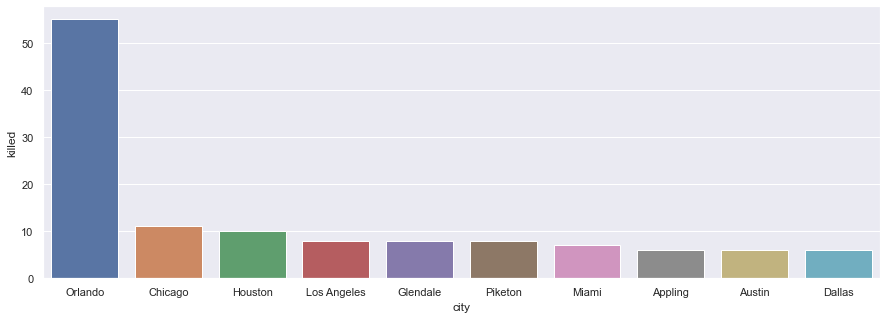

In [37]:
sns.set(rc= {'figure.figsize':(15,5)})
sns.barplot(x = "city", y = "killed", data = bar_chart_df)

In [38]:
bar_chart_df = shootings_df.groupby(["state"]).agg(injured = ("injured", "sum"))
bar_chart_df = bar_chart_df.sort_values("injured", ascending=False).head(5).reset_index()
bar_chart_df

,state,injured
0,Florida,169
1,California,155
2,Illinois,127
3,Texas,94
4,New York,57


<AxesSubplot:xlabel='state', ylabel='injured'>

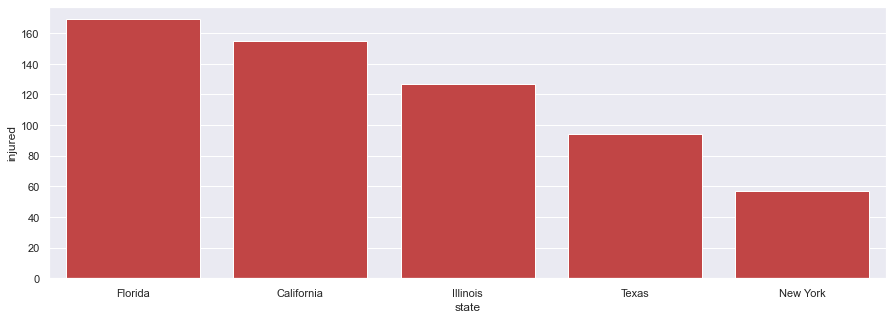

In [39]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "state", y = "injured", data = bar_chart_df, color = "#d63031")